# GIỚI THIỆU

**Nguồn:** https://www.kaggle.com/sakshigoyal7/credit-card-customers

**Nêu vấn đề:** Một nhà quản lý ngân hàng không hài lòng với việc ngày càng có nhiều khách hàng rời bỏ dịch vụ thẻ tín dụng của ngân hàng.

**Mục tiêu:** Tìm ra nguyên nhân khách hàng rời bỏ dịch vụ thẻ tín dụng và dự đoán những người có nguy cơ cao rời bỏ trong tương lai.

**Lợi ích:** 
1.   Giảm lượng khách hàng rời bỏ thì sẽ tăng lợi nhuận của ngân hàng.
2.   Các chuyên gia ước tính rằng chi phí để có được khách hàng mới cao hơn gấp 5 lần so với chi phí duy trì khách hàng hiện tại.





#DATASET 
**Đặc điểm bảng:**
  1.  Ưu điểm: Dữ liệu sạch, do đó làm giảm thời gian để làm sạch dữ liệu.
  2.  Nhược điểm: Dữ liệu phân bố không đều.

**Giới thiệu cột chính:**


1.   Attrition_Flag: Hoạt động khách hàng
2.   Customer_Age: Độ tuổi khách hàng trong nhiều năm
3.   Gender: Giới tính
4.   Education_Level: Trình độ học vắn của người chủ thẻ
5.   Marital_Status: Tình trạng hôn nhân
6.   Card_Category: Loại thẻ
7.   Income_category: Thu nhập hằng năm của người chủ thẻ
8.   Months_Inactive_12_mon: Số tháng thẻ tín dụng không được sử dụng trong vòng 12 tháng qua
9.   Avg_Ultilization_Ratio: Tỉ lệ sử dụng nợ tín dụng





# CÀI ĐẶT VÀ THIẾT LẬP


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/BT1_Nhóm 7'
%ls\

/content/drive/MyDrive/BT1_Nhóm 7
Code/  Dataset/


In [ ]:
%cd '/content/drive/MyDrive/BT1_Nhóm 7/Dataset'

/content/drive/MyDrive/BT1_Nhóm 7/Dataset


In [ ]:
%ls

BankChurners.csv


In [ ]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#tải dữ liệu file .csv
df = pd.read_csv('BankChurners.csv')


In [ ]:
#Loại bỏ cột dữ liệu không dùng đến
#Nhà cung cấp dữ liệu khuyên bỏ qua vì 2 cột này sử dụng mô hình Machine Learning
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Kiểm tra dữ liệu có giá trị null hay không?
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#Kiểm tra kích thước của file dữ liệu
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 10127 rows and 21 columns.


In [ ]:
#Kiểm tra các giá trị cột Attrition_Flag  Hoạt động khách hàng
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#Kiểm tra bao nhiều người đóng tài khoản tín dụng
attrition = df[(df['Attrition_Flag'] == 'Attrited Customer')]

#Lấy dataframe với điều kiện tài khoản tín dụng đã đóng và khách hàng là nam
men_att = attrition[attrition['Gender'] == 'M']
#Lấy dataframe với điều kiện tài khoản tín dụng đã đóng và khách hàng là nữ
women_att = attrition[attrition['Gender'] == 'F']

In [ ]:
#Đếm số tài khoản đã đóng và khách hàng là nam
len(men_att)

697

In [ ]:
#Đếm số tài khoản đã đóng và khách hàng là nữ
len(women_att)

930



> Phụ nữ có xu hướng rời bỏ dịch vụ tín dụng ngân hàng nhiều hơn đàn ông.





In [ ]:
#Phân loại khách hàng theo độ tuổi(Rời bỏ dịch vụ)
#Tính độ tuỏi trung bình chuẩn
attrition['Customer_Age'].mean()

46.659496004917024

In [ ]:
#Tính độ lệch chuẩn
attrition['Customer_Age'].std()

7.665651603482924



> Những người trên 55 tuổi thường không sử dụng thẻ tín dụng




In [ ]:
#Kiểm tra trình độ học vấn của chủ thẻ là Nam
men_att['Education_Level'].value_counts()



Graduate         194
High School      134
Uneducated       110
Unknown          105
College           75
Post-Graduate     48
Doctorate         31
Name: Education_Level, dtype: int64

In [ ]:
#Kiểm tra trình độ học vấn của chủ thẻ là Nu
women_att['Education_Level'].value_counts()

Graduate         293
High School      172
Unknown          151
Uneducated       127
College           79
Doctorate         64
Post-Graduate     44
Name: Education_Level, dtype: int64

In [ ]:
#Kiểm tra tình trạng hôn nhân của chủ thẻ là Nam
men_att['Marital_Status'].value_counts()

Married     297
Single      287
Unknown      60
Divorced     53
Name: Marital_Status, dtype: int64

In [ ]:
#Kiểm tra tình trạng hôn nhân của chủ thẻ là Nữ
women_att['Marital_Status'].value_counts()

Married     412
Single      381
Unknown      69
Divorced     68
Name: Marital_Status, dtype: int64

> Những người đã kết hôn và đang độc thân có nguy cơ rời bỏ dịch vụ tín dụng cao hơn những người còn lại

In [ ]:
#Kiểm tra mức thu nhập của chủ thẻ là Nam
men_att['Income_Category'].value_counts()

$80K - $120K      242
$60K - $80K       189
$120K +           126
$40K - $60K       105
Less than $40K     30
Unknown             5
Name: Income_Category, dtype: int64

In [ ]:
#Kiểm tra mức thu nhập của chủ thẻ là Nữ
women_att['Income_Category'].value_counts()


Less than $40K    582
Unknown           182
$40K - $60K       166
Name: Income_Category, dtype: int64


> Những người có thu nhập <40 và trên 120K thường rời bỏ dịch vụ

In [ ]:
#Kiểm tra loại thẻ của chủ thẻ là Nam
men_att['Card_Category'].value_counts()

Blue        629
Silver       54
Gold         13
Platinum      1
Name: Card_Category, dtype: int64

In [ ]:
#Kiểm tra loại thẻ của chủ thẻ là Nữ
women_att['Card_Category'].value_counts()

Blue        890
Silver       28
Gold          8
Platinum      4
Name: Card_Category, dtype: int64

> Những người rời bỏ dịch vụ tín dụng chủ yếu là người sử dụng loại thẻ Blue(thường)

In [ ]:
#Số tháng không hoạt động của thẻ trước khi chủ thẻ đóng(chủ thẻ là Nam)
men_att['Months_Inactive_12_mon'].value_counts()

3    352
2    208
4     63
1     50
5     13
6      7
0      4
Name: Months_Inactive_12_mon, dtype: int64

In [ ]:
#Số tháng không hoạt động của thẻ trước khi chủ thẻ đóng(chủ thẻ là Nữ)
women_att['Months_Inactive_12_mon'].value_counts()


3    474
2    297
4     67
1     50
5     19
6     12
0     11
Name: Months_Inactive_12_mon, dtype: int64

> Những người thường không sử dụng trong 2-3 tháng thì nguy cơ rời bỏ dịch vụ cao

In [ ]:
men_att['Avg_Utilization_Ratio'].value_counts()
#Ti Le giao dich voi ngan hang

0.000    373
0.073      9
0.016      4
0.051      3
0.025      3
        ... 
0.805      1
0.273      1
0.321      1
0.322      1
0.399      1
Name: Avg_Utilization_Ratio, Length: 234, dtype: int64

In [ ]:


women_att['Avg_Utilization_Ratio'].value_counts()

0.000    520
0.112      3
0.446      3
0.413      3
0.312      3
        ... 
0.210      1
0.785      1
0.505      1
0.272      1
0.015      1
Name: Avg_Utilization_Ratio, Length: 342, dtype: int64

>Tỉ lệ giao dịch với ngân hàng trong 1 tháng bằng 0% thì nguy cơ rời bỏ dịch vụ thẻ tín dụng càng cao

> Theo nhóm em, nguyên nhân chính dẫn đến đóng thẻ là không sử dụng thẻ

# BIỂU ĐỒ

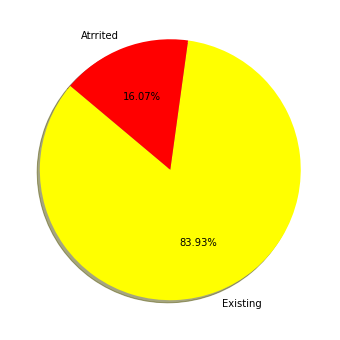

In [ ]:
labels=['Existing','Atrrited']
colors = ["yellow","red"]
plt.figure(figsize = (13, 6))
plt.pie(df['Attrition_Flag'].value_counts(),labels=labels,colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140) 
plt.show()

> Chúng ta có thể thấy số lượng khách hàng còn hoạt động gấp 5 lần số lượng khách hàng bị khóa.

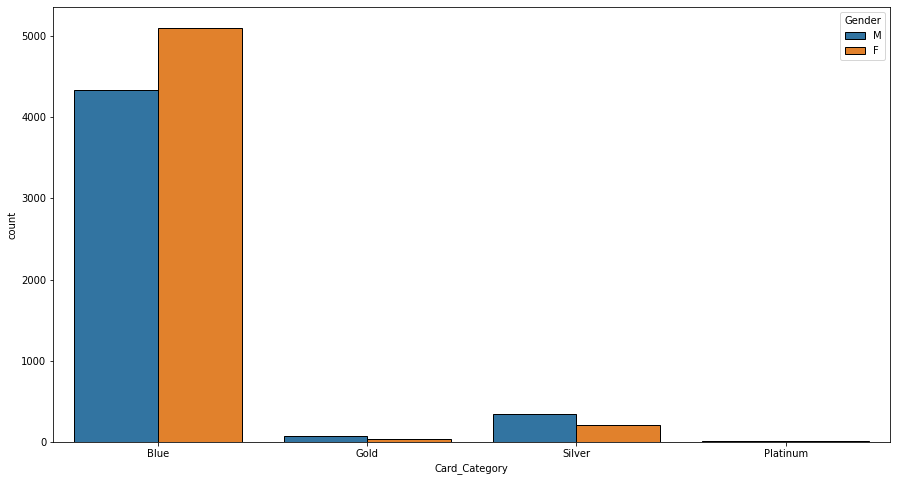

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x = df['Card_Category'], hue = df['Gender'], edgecolor = 'black')
plt.show()

> Thống kê số người nam nữ sài thẻ xanh, vàng, bạc, bạch kim

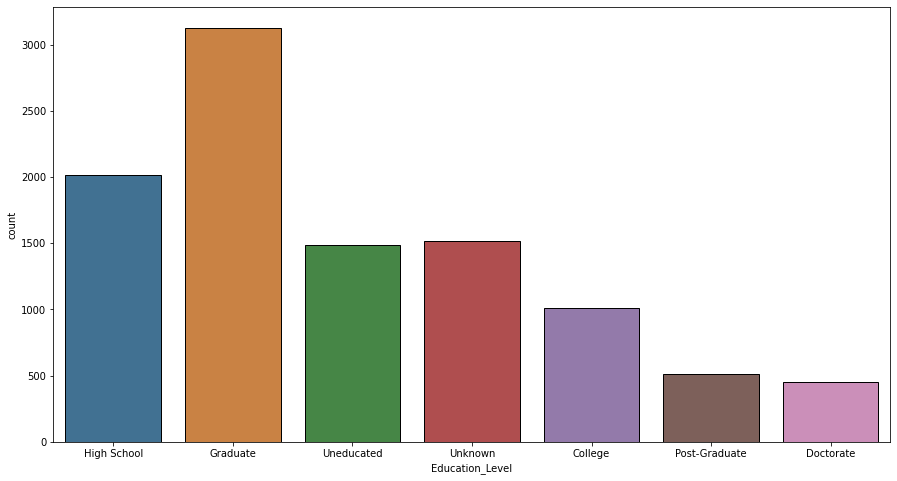

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x= df['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

> Thống kê trình độ học vấn của khách hàng


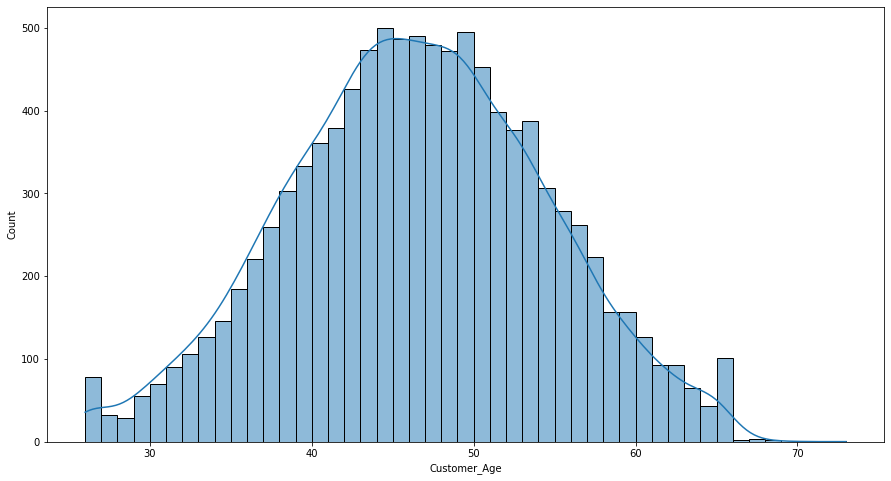

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(df['Customer_Age'],kde=True)

> Độ tuổi khách hàng sử dụng

> kde = True để xác nhận chúng ta sử dụng phương pháp KDE để tính toán đường cong hàm mật độ


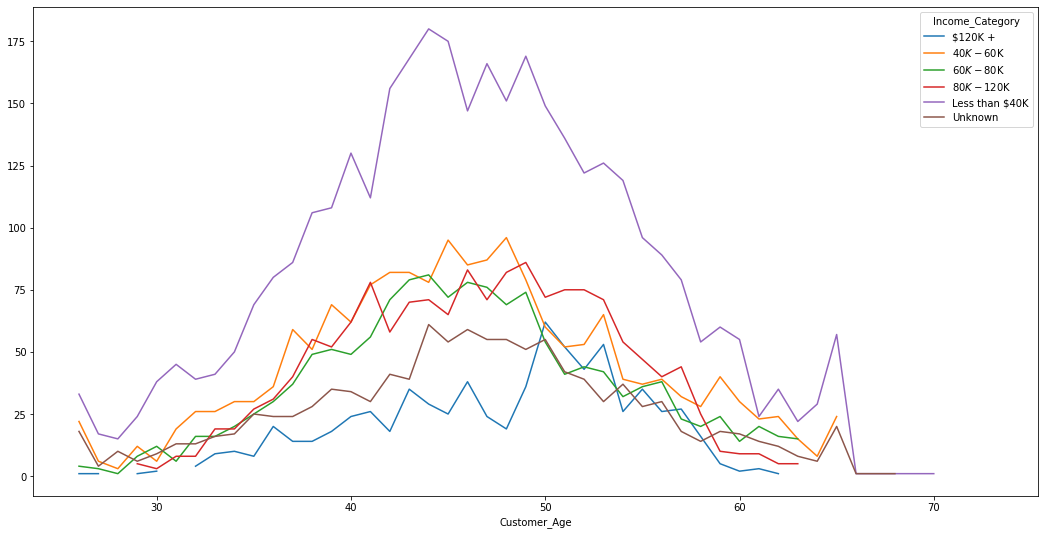

In [ ]:
fig,ax = plt.subplots(figsize = (18, 9))
df.groupby(['Customer_Age','Income_Category']).count()['Gender'].unstack().plot(ax=ax)


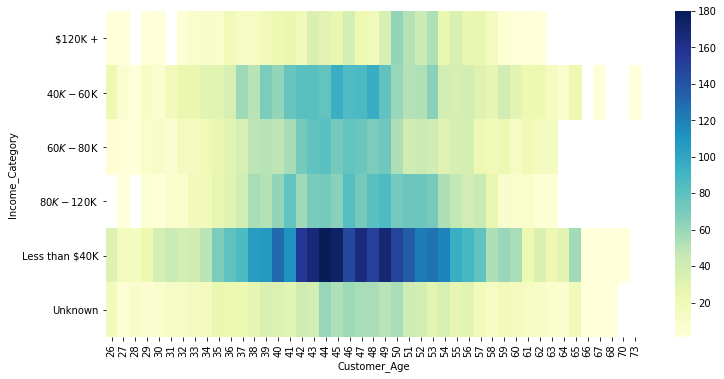

In [ ]:
fig,ax = plt.subplots(figsize = (12, 6))
a=df.groupby(['Income_Category','Customer_Age']).count()['Gender'].unstack()
sns.heatmap(a,cmap="YlGnBu")

> Thống kê mức thu nhập theo độ tuổi. Độ tuổi tầm 50 chiếm mức lương cao nhất.

